# Explore here

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importar y leer los datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [139]:
#Dimensiones de los datos
df.shape

(48895, 16)

In [140]:
#Informacion de los dastos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [141]:
#Conteo y posible eliminacion de duplicados
df.duplicated().sum()

np.int64(0)

In [142]:
df.drop(["id","host_id","name","host_name","latitude","longitude","last_review","reviews_per_month"],axis=1,inplace=True)
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


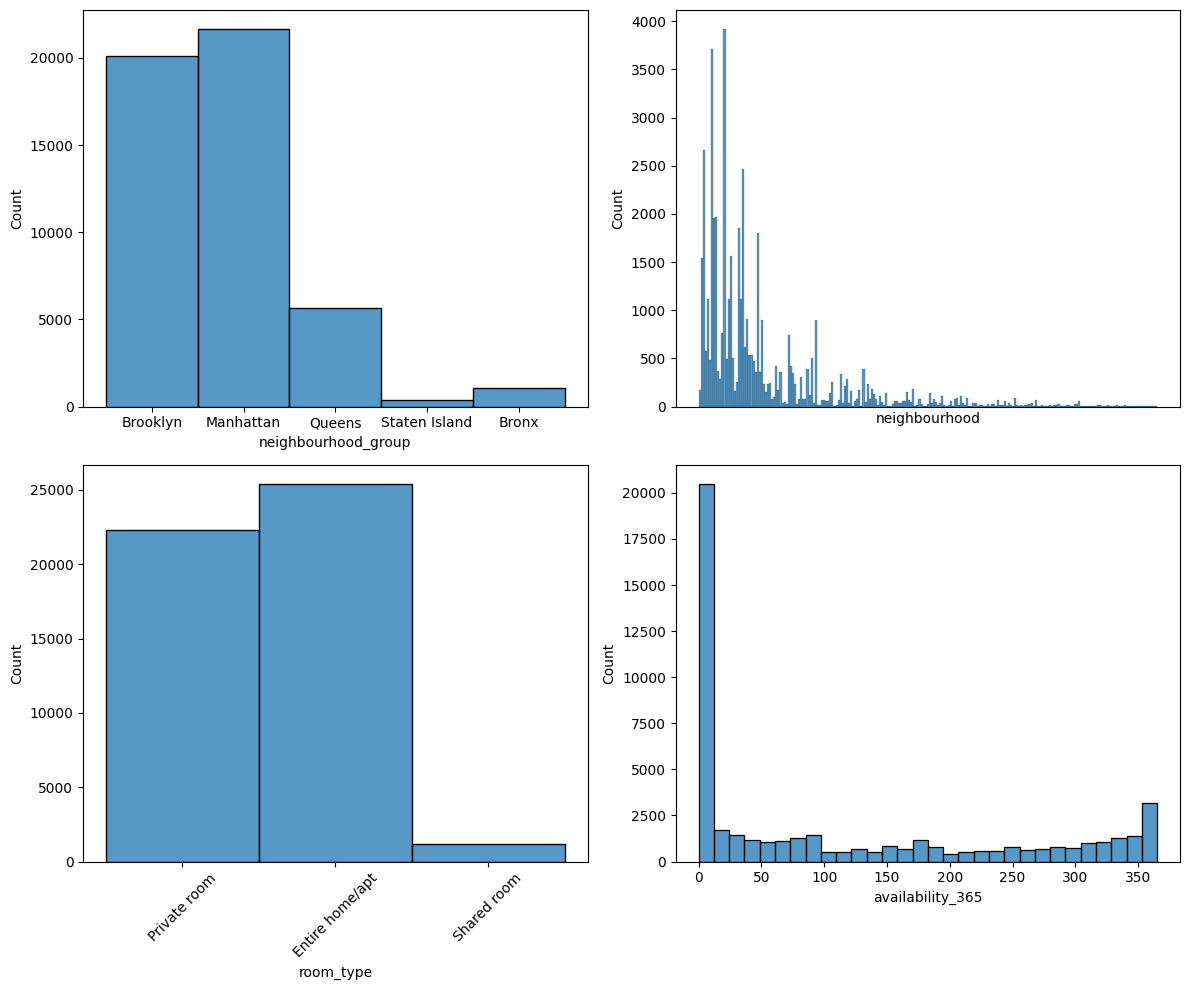

In [143]:
#Visualizacion datos categoricos
fig, axis = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(ax = axis[0,0], data = df, x = "neighbourhood_group")
sns.histplot(ax = axis[0,1], data = df, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = df, x = "room_type")
axis[1,0].tick_params(axis='x', rotation=45)
sns.histplot(ax = axis[1,1], data = df, x = "availability_365")

plt.tight_layout()
plt.show()

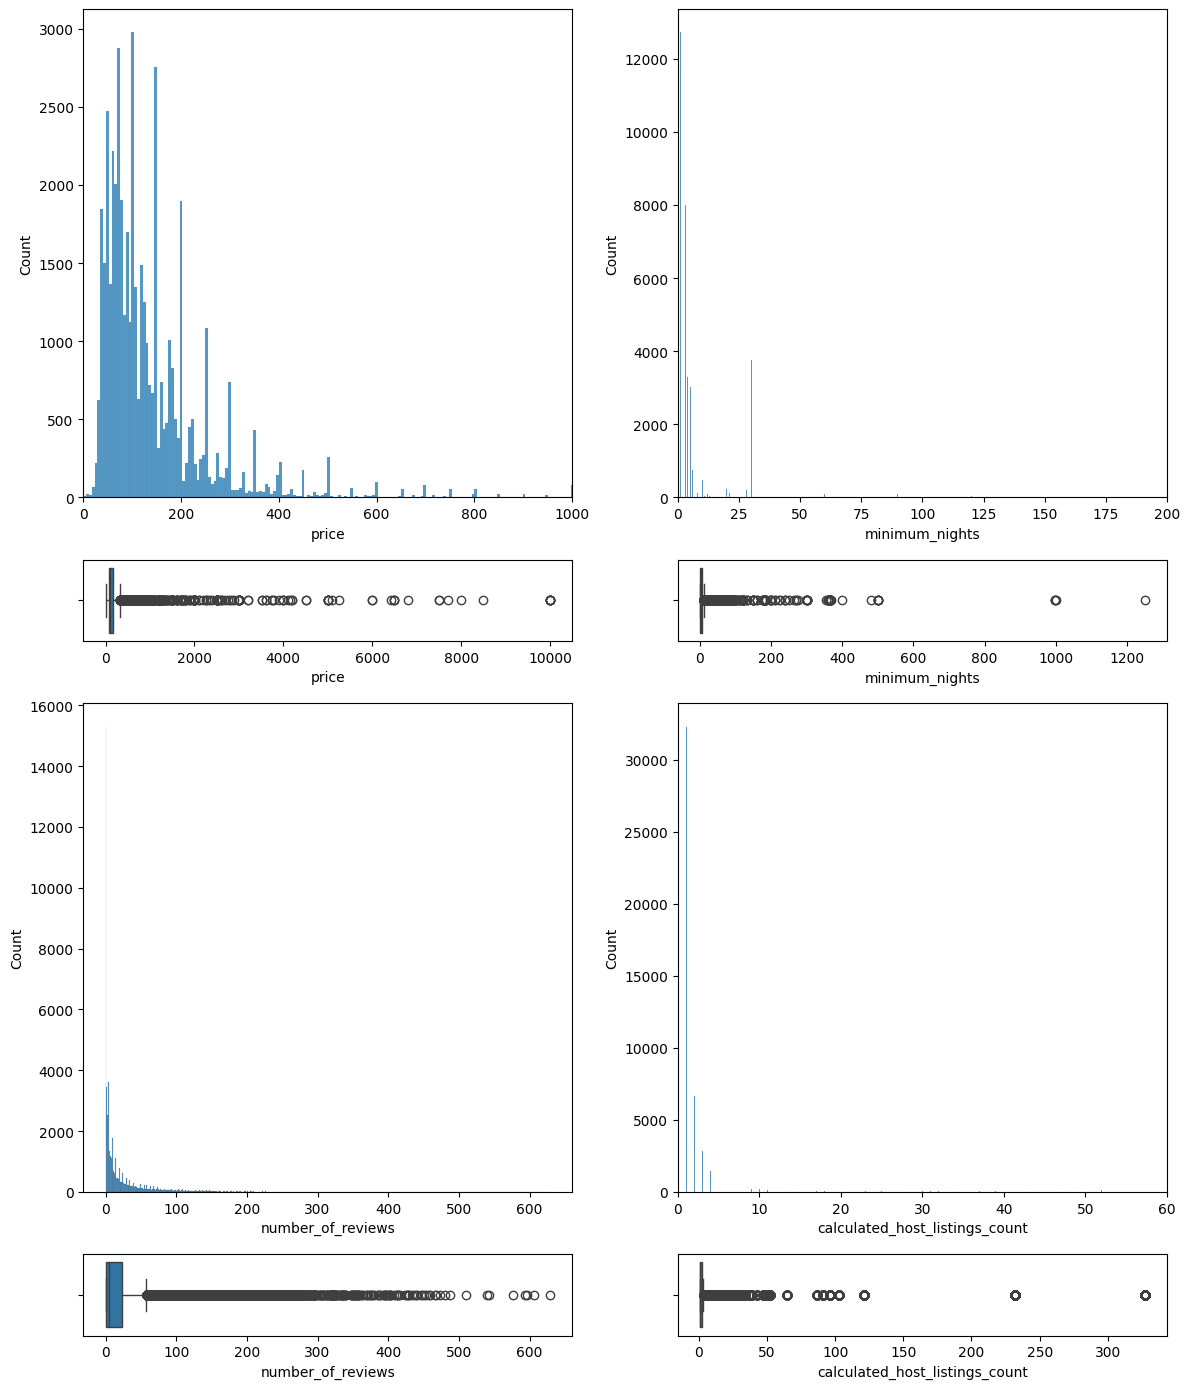

In [144]:
#Visualizacion datos numericos
fig, axis = plt.subplots(4, 2, figsize = (12, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "price").set_xlim(0, 1000)
sns.boxplot(ax = axis[1, 0], data = df, x = "price")

sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = df, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = df, x = "calculated_host_listings_count").set_xlim(0, 60)
sns.boxplot(ax = axis[3, 1], data = df, x = "calculated_host_listings_count")

plt.tight_layout()
plt.show()

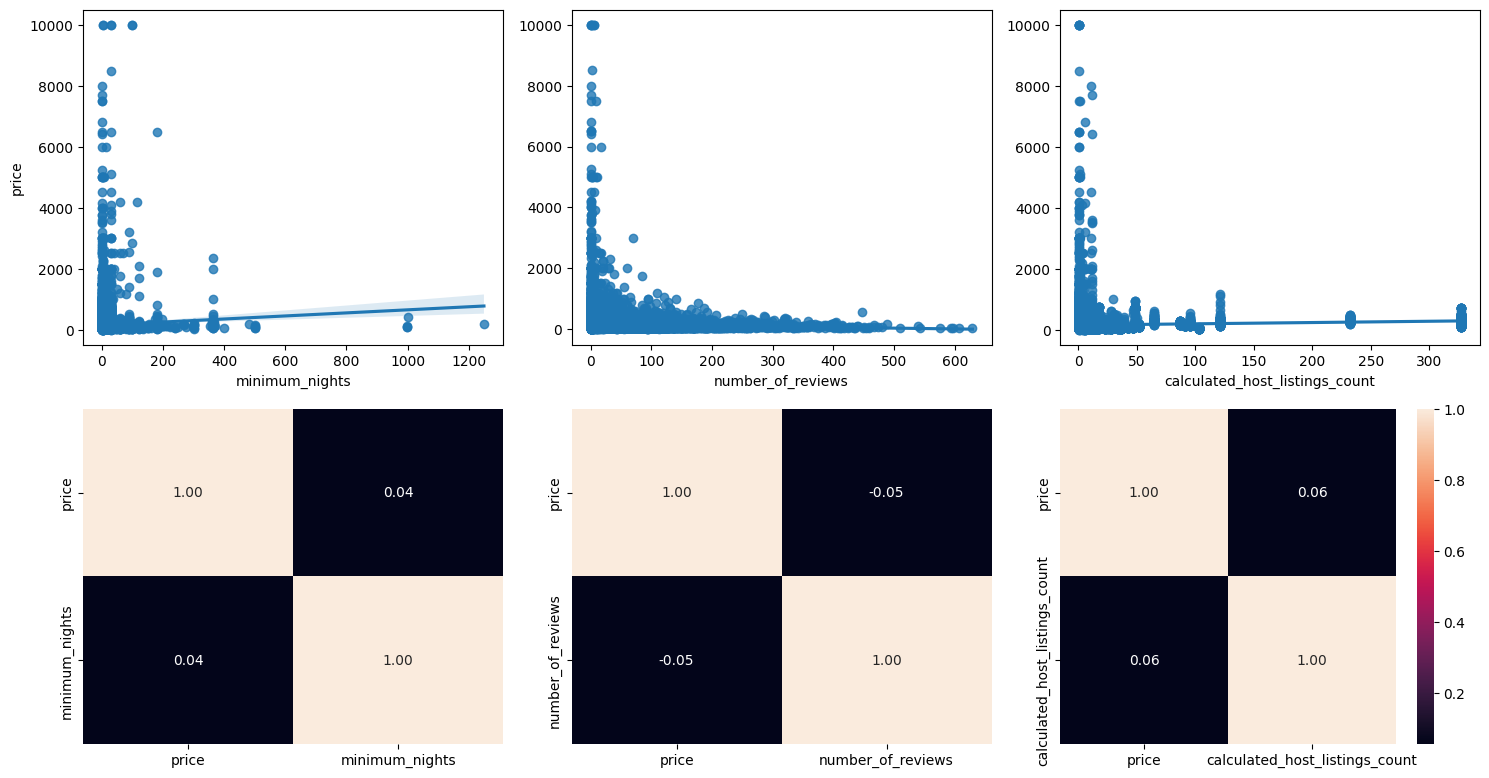

In [145]:
#Analisis entre parametros numericos
fig, axis = plt.subplots(2, 3, figsize = (15, 8))

sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = df, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

plt.tight_layout()
plt.show()

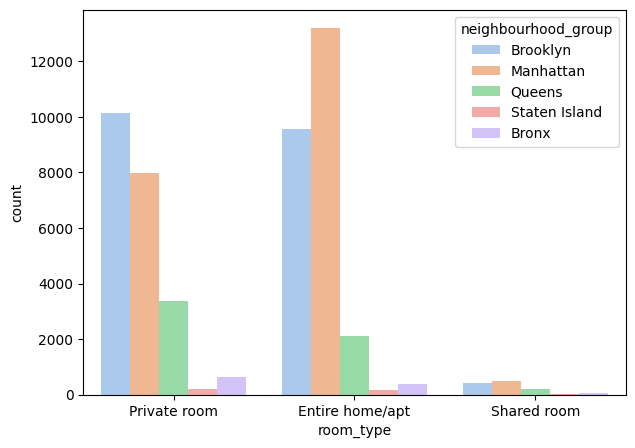

In [146]:
#Analisis entre parametros categoricos
fig, axis = plt.subplots(figsize = (7, 5))

sns.countplot(data = df, x = "room_type", palette="pastel", hue = "neighbourhood_group")
plt.show()

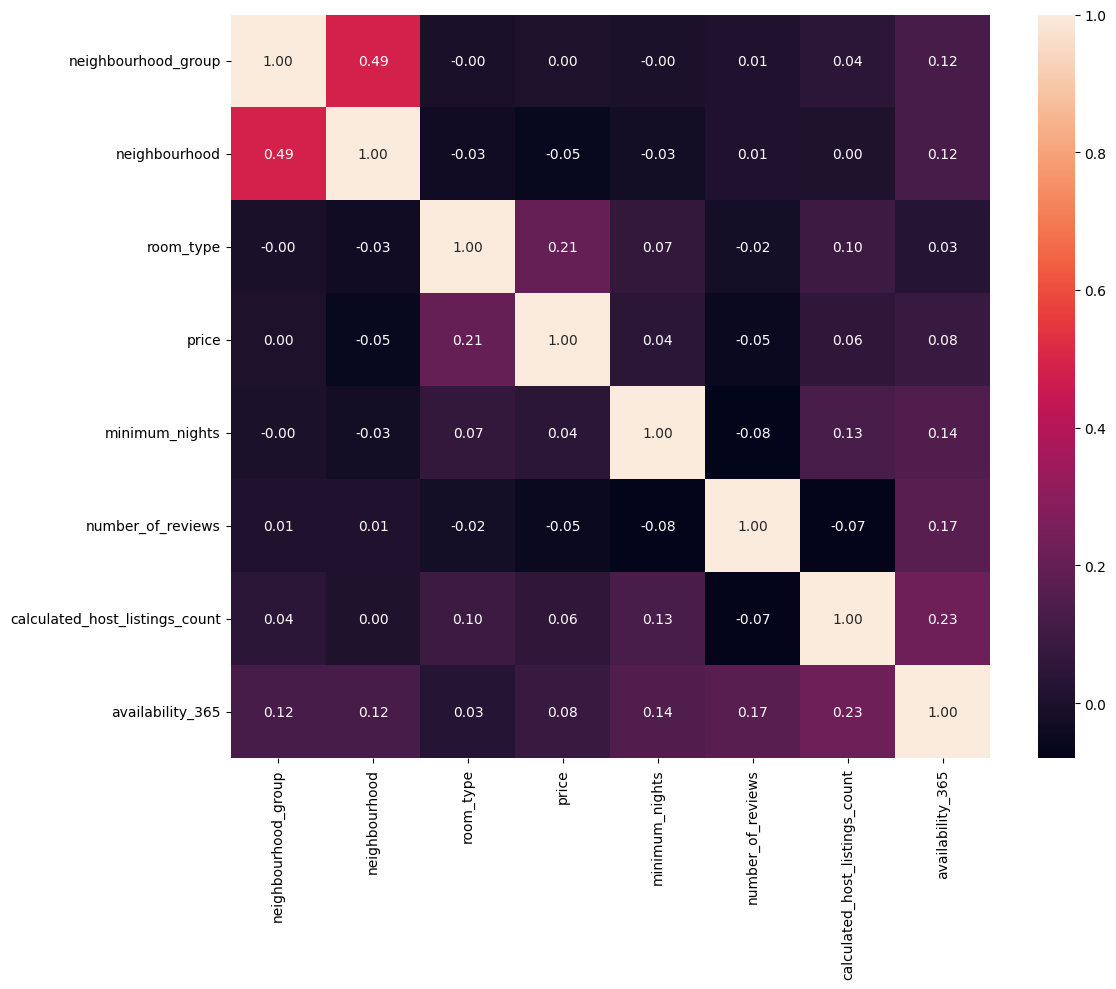

In [147]:
#Analisis entre parametros numericos y categoricos
df["room_type"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(12, 10))

sns.heatmap(df[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	"number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

In [148]:
#Buscando valores y visualizando posibles valoores atipicos
df.describe()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.786911,29.888782,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.844386,34.676634,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,7.500000,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,19.000000,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.000000,37.000000,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,4.000000,220.000000,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


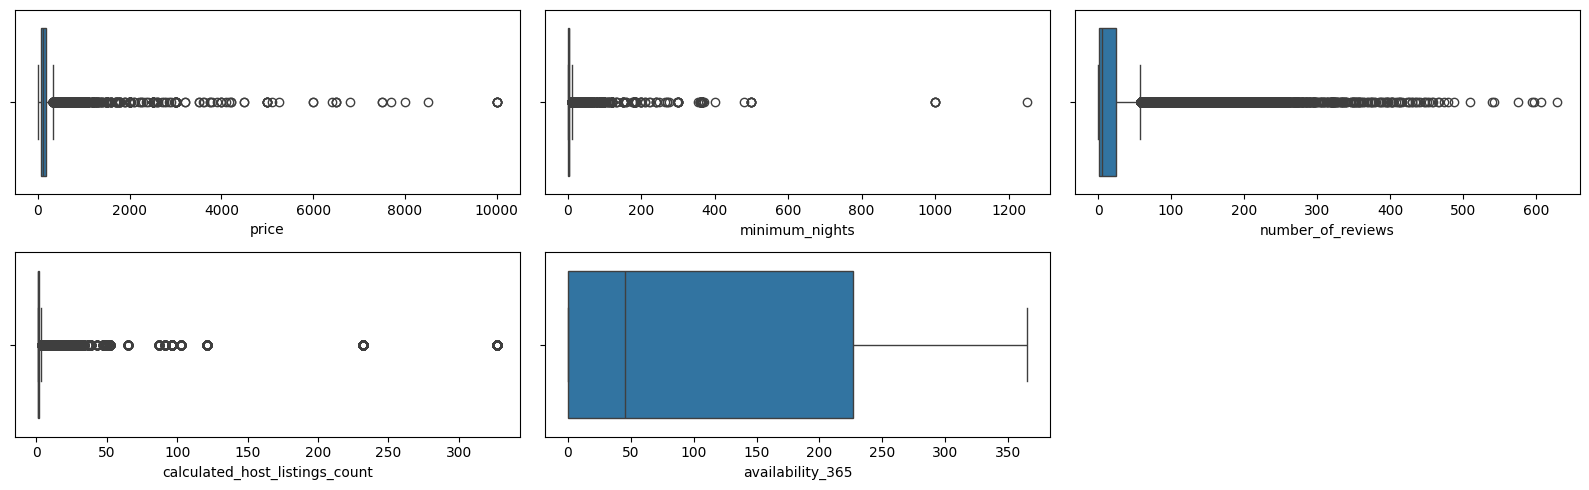

In [149]:
fig, axis = plt.subplots(2, 3, figsize = (16, 5))

sns.boxplot(ax = axis[0, 0], data = df, x = "price")
sns.boxplot(ax = axis[0, 1], data = df, x = "minimum_nights")
sns.boxplot(ax = axis[0, 2], data = df, x = "number_of_reviews")
sns.boxplot(ax = axis[1, 0], data = df, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 1], data = df, x = "availability_365")
fig.delaxes(axis[1,2])

plt.tight_layout()
plt.show()

In [150]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
price_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * price_IQR
lower_limit = Q1 - 1.5 * price_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_IQR, 2)}")



Los límites superior e inferior para la búsqueda de valores atipicos son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [151]:
df[df['price']>334].shape

(2972, 8)

In [152]:
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
minimum_nights_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * minimum_nights_IQR
lower_limit = Q1 - 1.5 * minimum_nights_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(minimum_nights_IQR, 2)}")

Los límites superior e inferior para la búsqueda de valores atipicos son 11.0 y -5.0, con un rango intercuartílico de 4.0


In [153]:
df[df['minimum_nights']>14].shape

(5900, 8)

In [154]:
Q1 = df['number_of_reviews'].quantile(0.25)
Q3 = df['number_of_reviews'].quantile(0.75)
number_of_reviews_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * number_of_reviews_IQR
lower_limit = Q1 - 1.5 * number_of_reviews_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(number_of_reviews_IQR, 2)}")

Los límites superior e inferior para la búsqueda de valores atipicos son 58.5 y -33.5, con un rango intercuartílico de 23.0


In [155]:
df[df['number_of_reviews']>59].shape

(5890, 8)

In [156]:
Q1 = df['calculated_host_listings_count'].quantile(0.25)
Q3 = df['calculated_host_listings_count'].quantile(0.75)
calculated_host_listings_count_IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * calculated_host_listings_count_IQR
lower_limit = Q1 - 1.5 * calculated_host_listings_count_IQR

print(f"Los límites superior e inferior para la búsqueda de valores atipicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(calculated_host_listings_count_IQR, 2)}")

Los límites superior e inferior para la búsqueda de valores atipicos son 3.5 y -0.5, con un rango intercuartílico de 1.0


In [157]:
df[df['calculated_host_listings_count']>4].shape

(5641, 8)

Las variables 'minimum_nights', 'number_of_reviews' y 'calculated_host_listings_count' tienen una cantidad elevada de valores atípicos dentro de los limites seleccionados (cantidades superiores al 10%).
La variable 'minimum_nights' es quizas dificil de interpretar ya que pueden depender no solo del host, si no del tipo de piso y público al que se apunta. Del mismo modo podria estar relacionado con el precio (a menor numero minimo de noches mayor precio por noche, y a mayor numero minimo menor precio)
Los valores atípicos de la variable 'number_of_reviews' probablemente esten relacionados con los pisos mas utilizados, ya sea por antigüedad o popularidad, por lo que considero interesante mantener estos valores para el estudio.
No considero que se deban eliminar los valores atípicos de la variable 'calculated_host_listings_count' ya que podría tratarse de empresas con varios pisos en alquiler.
En cuanto a la variable 'price' si bien la cantidad de valores atipicos es menor, podria deberse a parametros no contemplados en este dataset, como el tamaño del piso, numero de habitaciones, etc...

Dadas estas explicaciones y la cantidad de valores atipicos en los limites utilizados, considero la no eliminacion de dichos valores.

In [158]:
#Deteccion y llenado de valores nulos
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [159]:
#Division en train y test
from sklearn.model_selection import train_test_split

X = df.drop("price", axis = 1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

X_train.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
532,1,8,0,6,35,1,180
16003,0,21,1,2,104,1,237
24347,1,11,1,1,0,1,0
1243,0,12,1,2,11,1,0
962,1,2,0,3,10,3,359


In [160]:
#Normalizacion de los valores
from sklearn.preprocessing import MinMaxScaler

columnas = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", "availability_365"]
scaler = MinMaxScaler()

X_train_num_norm = scaler.fit_transform(X_train[columnas])
X_train_num_norm = pd.DataFrame(X_train_num_norm, index=X_train.index, columns=columnas)

X_test_num_norm = scaler.fit_transform(X_test[columnas])
X_test_num_norm = pd.DataFrame(X_test_num_norm, index=X_test.index, columns=columnas)

X_train_num_norm.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365
532,0.055644,0.004003,0.000000,0.493151
16003,0.165342,0.000801,0.000000,0.649315
24347,0.000000,0.000000,0.000000,0.000000
1243,0.017488,0.000801,0.000000,0.000000
962,0.015898,0.001601,0.006135,0.983562


In [161]:
#codificando variables categoricas
from sklearn.preprocessing import LabelEncoder

X_train_cat = X_train.copy()
X_test_cat = X_test.copy()

label_encoder_neighbourhood_group = LabelEncoder()
label_encoder_room_type = LabelEncoder()
label_encoder_neighbourhood = LabelEncoder()

X_train_cat['neighbourhood_group'] = label_encoder_neighbourhood_group.fit_transform(X_train['neighbourhood_group'])
X_train_cat['neighbourhood'] = label_encoder_neighbourhood.fit_transform(X_train['neighbourhood'])
X_train_cat['room_type'] = label_encoder_room_type.fit_transform(X_train['room_type'])

X_test_cat['neighbourhood_group'] = label_encoder_neighbourhood_group.fit_transform(X_test['neighbourhood_group'])
X_test_cat['neighbourhood'] = label_encoder_neighbourhood.fit_transform(X_test['neighbourhood'])
X_test_cat['room_type'] = label_encoder_room_type.fit_transform(X_test['room_type'])

X_train_cat.head(20)

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
532,1,8,0,6,35,1,180
16003,0,21,1,2,104,1,237
24347,1,11,1,1,0,1,0
1243,0,12,1,2,11,1,0
962,1,2,0,3,10,3,359
20692,0,6,0,1,16,2,8
48500,2,44,0,1,0,1,165
44172,1,2,0,1,5,1,0
2322,0,13,0,5,4,1,250
13611,0,33,1,3,9,1,0


In [164]:
X_train_cat_filt = X_train_cat[X_train_cat.columns.difference(X_train_num_norm.columns)]
X_test_cat_filt = X_test_cat[X_test_cat.columns.difference(X_test_num_norm.columns)]
X_train_final = pd.concat([X_train_num_norm, X_train_cat_filt], axis=1)
X_test_final = pd.concat([X_test_num_norm, X_test_cat_filt], axis=1)

X_train_final.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood,neighbourhood_group,room_type
532,0.055644,0.004003,0.000000,0.493151,8,1,0
16003,0.165342,0.000801,0.000000,0.649315,21,0,1
24347,0.000000,0.000000,0.000000,0.000000,11,1,1
1243,0.017488,0.000801,0.000000,0.000000,12,0,1
962,0.015898,0.001601,0.006135,0.983562,2,1,0


In [166]:
#Seleccionando las caracteristicas
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(score_func = f_classif, k = 5)

X_train_sel = pd.DataFrame(selection_model.fit_transform(X_train_final,y_train), columns = X_train_final.columns.values[selection_model.get_support()])
X_test_sel = pd.DataFrame(selection_model.fit_transform(X_test_final,y_test), columns = X_test_final.columns.values[selection_model.get_support()])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood,room_type
0,0.004003,0.000000,0.493151,8.0,0.0
1,0.000801,0.000000,0.649315,21.0,1.0
2,0.000000,0.000000,0.000000,11.0,1.0
3,0.000801,0.000000,0.000000,12.0,1.0
4,0.001601,0.006135,0.983562,2.0,0.0
